In [2]:
import pymysql

In [12]:
# 
# DB테이블 값 조회 (SELECT)
#
# MySQL Connection 연결
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')
 
try :
    with connection.cursor() as cursor :       # Connection 으로부터 Cursor 생성
        sql = "select * from stock_hye"           # SQL문 실행
        cursor.execute("set names utf8")
        cursor.execute(sql)
        result = cursor.fetchall()            # 데이터 fetch
        
        for i in result :
            print(i)
finally :
    # Connection 닫기
    connection.close()

In [23]:
# 
# DB테이블 값 삽입 (INSERT)
#
# MySQL Connection 연결
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')
try:
    with connection.cursor() as cursor:
        sql = 'INSERT INTO stock_hye (company_name, stock_price) VALUES (%s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price)'
        cursor.execute(sql, ('samsung', 1200))          # 넣으려는 값
        sql = 'INSERT INTO stock_hye (company_name, stock_price) VALUES (%s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price)'
        cursor.execute(sql, ('kakao', 12000))          # 넣으려는 값
    connection.commit()
    print(cursor.lastrowid)
    # 1 (last insert id)
    
finally:
    connection.close()

0


C:\source\SPF


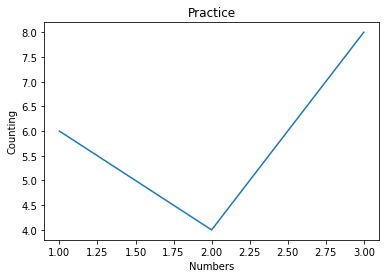

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import settings

x = [1,2,3]
y = [6,4,8]

#plt.figure()   
plt.plot(x, y)
plt.xlabel('Numbers')
plt.ylabel('Counting')

plt.title('Practice')

print(settings.BASE_DIR)

plt.savefig("./chart_picture/samsung.png",dpi=300)
plt.show()

In [71]:
import pymysql

#
# 사진 데이터 binary형식으로 바꿔서 DB에 INSERT
#
def convertToBinaryData(filename):
    #Convert digital data to binary format
    with open(filename, 'rb') as file:
        binaryData = file.read()
    return binaryData

connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = 'INSERT INTO stock_hye (company_name, stock_price, image) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price), image = VALUES(image)'
        image = convertToBinaryData("C:\source\SPF\chart_picture\kakao.png")
        cursor.execute(sql, ('kakao', 0, image))          # 넣으려는 값
    connection.commit()
    print(cursor.lastrowid)
    # 1 (last insert id)

finally:
    connection.close()

14


In [79]:
import pymysql
#
# DB에 저장된 binary를 이미지로 컴퓨터에 저장하기 (값이 잘 들어갔는지 확인)
#
def write_file(data, filename):
    # Convert binary data to proper format and write it on Hard Disk
    print(filename)
    with open(filename, 'wb') as file:
        file.write(data)
        
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "select * from stock_hye where company_name = %s "
        cursor.execute(sql, ('kakao', ))
        record = cursor.fetchall()
        for row in record:
            print("company_name = ", row[1])
            image =  row[3]
            print("Storing employee image and bio-data on disk \n")
            write_file(image, r"C:\source\SPF\chart_picture\test\kakao_test.png")
    connection.commit()

    
finally:
    connection.close()
    print("MySQL connection is closed")

company_name =  b'kakao'
Storing employee image and bio-data on disk 

C:\source\SPF\chart_picture\test\kakao_test.png
MySQL connection is closed


In [80]:
import pymysql

def write_file(data, filename):
    # Convert binary data to proper format and write it on Hard Disk
    print(filename)
    with open(filename, 'wb') as file:
        file.write(data)
        
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "select * from stock_hye where company_name = %s "
        cursor.execute(sql, ('samsung', ))          # 넣으려는 값
        record = cursor.fetchall()
        for row in record:
            print("company_name = ", row[1])
            image =  row[3]
            print("Storing employee image and bio-data on disk \n")
            write_file(image, r"C:\source\SPF\chart_picture\test\samsung_test.png")
    connection.commit()

    
finally:
    connection.close()
    print("MySQL connection is closed")

company_name =  b'samsung'
Storing employee image and bio-data on disk 

C:\source\SPF\chart_picture\test\samsung_test.png
MySQL connection is closed
